# Importing Necessary Libraries for Analysis


In [1]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical visualizations



### Loading the Data set

In [2]:
df = pd.read_csv("data.csv")  


### Checking the Data Structure

In [3]:
# Display first 5 rows
df.head()


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,clientsid,Gender,CountyOfBirth,Age,EntryPoint,ReferredOrTransferredFrom,InitialVisitDate,BP,Weight_,Height,SignOfSti,Lmp,Cluster,FacilityType,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
0,10269-07-1/18,M,Kisii,38,Referred,VCT Site,2018-03-14,113/82,68.0,172.0,No,1900-01-01,Nairobi,Public,1,1,1,1,1,0
1,10269-07-2/18,F,Meru,44,Referred,VCT Site,2018-04-11,120/84,102.0,168.0,No,1900-01-01,Nairobi,Public,1,1,1,1,0,1
2,10269-07-3/18,M,Kiambu,40,Referred,Outreach,2018-04-04,113/84,0.0,0.0,No,1900-01-01,Nairobi,Public,1,1,1,1,0,1
3,10269-07-4/18,M,Bungoma,24,Referred,VCT Site,2018-04-11,000/00,0.0,0.0,No,1900-01-01,Nairobi,Public,1,1,1,0,0,1
4,10269-07-5/18,F,Kiambu,31,Referred,VCT Site,2018-05-13,000/00,75.5,759.5,No,2018-04-01,Nairobi,Public,1,1,0,0,0,1


In [4]:
# Display column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22131 entries, 0 to 22130
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   clientsid                  22131 non-null  object 
 1   Gender                     22131 non-null  object 
 2   CountyOfBirth              22131 non-null  object 
 3   Age                        22131 non-null  int64  
 4   EntryPoint                 22131 non-null  object 
 5   ReferredOrTransferredFrom  22131 non-null  object 
 6   InitialVisitDate           22131 non-null  object 
 7   BP                         21824 non-null  object 
 8   Weight_                    22014 non-null  float64
 9   Height                     22014 non-null  float64
 10  SignOfSti                  22014 non-null  object 
 11  Lmp                        22014 non-null  object 
 12  Cluster                    22131 non-null  object 
 13  FacilityType               22131 non-null  obj

In [5]:
# Summary statistics for numerical columns
df.describe()


,Age,Weight_,Height,Received_DP,Refill1month,Refill2months,Refill3months,Refill6months,received_counseling
count,22131.000000,22014.000000,2.201400e+04,22131.0,22131.000000,22131.000000,22131.000000,22131.000000,22131.000000
mean,27.284804,76.109112,1.907873e+02,1.0,0.476210,0.275857,0.178844,0.065926,0.521034
std,10.644699,1201.812775,1.063263e+04,0.0,0.499445,0.446955,0.383230,0.248158,0.499569
min,15.000000,0.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,50.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,60.000000,1.560000e+02,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,31.000000,68.000000,1.640000e+02,1.0,1.000000,1.000000,0.000000,0.000000,1.000000
max,544.000000,79174.000000,1.560000e+06,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling Missing Values

#### Cheking for missing values

In [6]:
df.isnull().sum()


clientsid                      0
Gender                         0
CountyOfBirth                  0
Age                            0
EntryPoint                     0
ReferredOrTransferredFrom      0
InitialVisitDate               0
BP                           307
Weight_                      117
Height                       117
SignOfSti                    117
Lmp                          117
Cluster                        0
FacilityType                   0
Received_DP                    0
Refill1month                   0
Refill2months                  0
Refill3months                  0
Refill6months                  0
received_counseling            0
dtype: int64

#### Dropping missing values

In [7]:

df.dropna(inplace=True)  # Drop rows with missing values


In [8]:
#confirming the missing values have been dropped
df.isnull().sum()


clientsid                    0
Gender                       0
CountyOfBirth                0
Age                          0
EntryPoint                   0
ReferredOrTransferredFrom    0
InitialVisitDate             0
BP                           0
Weight_                      0
Height                       0
SignOfSti                    0
Lmp                          0
Cluster                      0
FacilityType                 0
Received_DP                  0
Refill1month                 0
Refill2months                0
Refill3months                0
Refill6months                0
received_counseling          0
dtype: int64

### Handling Duplicates

#### cheking for Duplicates

In [9]:
df.duplicated().sum()  # Count duplicates



0

### Handling Outliers

In [10]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to relevant numeric columns
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Height')
df = remove_outliers(df, 'Weight_')



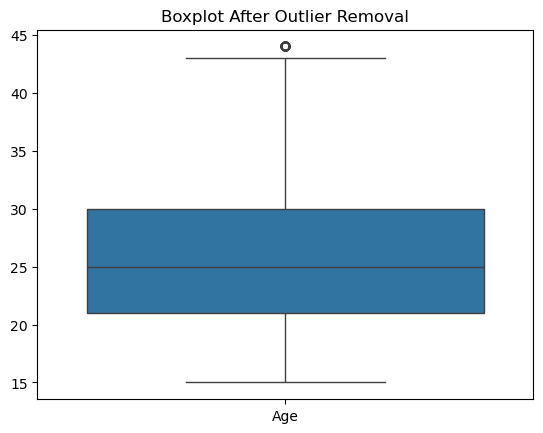

In [11]:
sns.boxplot(data=df[['Age', 'clientsid']])
plt.title("Boxplot After Outlier Removal")
plt.show()
